In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Variable Information

# label :-- Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
# msisdn :-- mobile number of user
# aon :-- age on cellular network in days
# daily_decr30 :-- Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
# daily_decr90 :-- Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
# rental30 :-- Average main account balance over last 30 days
# rental90  :-- Average main account balance over last 90 days
# last_rech_date_ma  :-- Number of days till last recharge of main account
# last_rech_date_da :-- Number of days till last recharge of data account
# last_rech_amt_ma :-- Amount of last recharge of main account (in Indonesian Rupiah)
# cnt_ma_rech30 :-- Number of times main account got recharged in last 30 days
# fr_ma_rech30 :-- Frequency of main account recharged in last 30 days
# sumamnt_ma_rech30  :-- Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
# medianamnt_ma_rech30 :-- Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
# medianmarechprebal30  :-- Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
# cnt_ma_rech90  :-- Number of times main account got recharged in last 90 days
# fr_ma_rech90  :-- Frequency of main account recharged in last 90 days
# sumamnt_ma_rech90  :-- Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
# medianamnt_ma_rech90  :-- Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
# medianmarechprebal90 :-- Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
# cnt_da_rech30 :-- Number of times data account got recharged in last 30 days
# fr_da_rech30  :-- Frequency of data account recharged in last 30 days
# cnt_da_rech90 :-- Number of times data account got recharged in last 90 days
# fr_da_rech90  :-- Frequency of data account recharged in last 90 days
# cnt_loans30 :-- Number of loans taken by user in last 30 days
# amnt_loans30 :-- Total amount of loans taken by user in last 30 days
# maxamnt_loans30 :-- maximum amount of loan taken by the user in last 30 days
# medianamnt_loans30 :-- Median of amounts of loan taken by the user in last 30 days
# cnt_loans90 :-- Number of loans taken by user in last 90 days
# amnt_loans90 :-- Total amount of loans taken by user in last 90 days
# maxamnt_loans90 :-- maximum amount of loan taken by the user in last 90 days
# medianamnt_loans90 :-- Median of amounts of loan taken by the user in last 90 days
# payback30  :-- Average payback time in days over last 30 days
# payback90 :-- Average payback time in days over last 90 days
# pcircle :-- telecom circle
# pdate  :-- date


In [3]:
#Loading   database
df=pd.read_csv("Data File.csv")
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [4]:
# Name of the columns
df.columns


Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
# Shape of the database 
df.shape

(209593, 37)

In [6]:
#information of the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
#finding null values in the database
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [8]:
df1 =df.drop(['Unnamed: 0'] , axis=1)
df1

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [9]:
df1.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


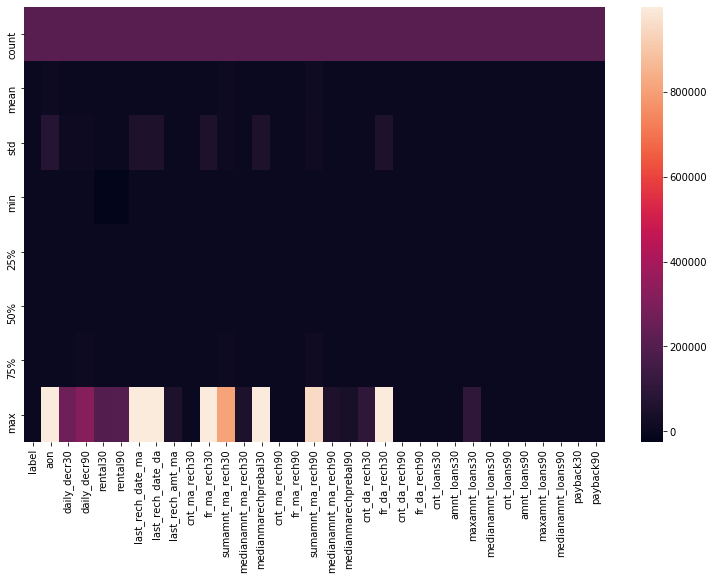

In [10]:
# Making  heatmap of describe.
plt.figure(figsize=(13,8))
sns.heatmap(df1.describe())

In [11]:
# Unique values of all columns
for col in df1:
    print(col)
    print(df[col].unique())
    print('')

label
[0 1]

msisdn
['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']

aon
[2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05]

daily_decr30
[ 3055.05       12122.          1398.         ... 11843.11166667
 12488.22833333  4489.362     ]

daily_decr90
[ 3065.15       12124.75        1398.         ...   151.87233333
 12574.37        4534.82      ]

rental30
[ 220.13 3691.26  900.13 ... 5861.83  411.83  483.92]

rental90
[ 260.13 3691.26  900.13 ... 1728.36 8893.2   984.58]

last_rech_date_ma
[2.00000000e+00 2.00000000e+01 3.00000000e+00 ... 7.67980563e+05
 6.11678500e+05 5.90843122e+05]

last_rech_date_da
[0.00000000e+00 5.50000000e+01 6.30000000e+01 ... 8.09043117e+05
 7.99233445e+05 6.36529127e+05]

last_rech_amt_ma
[ 1539  5787   947  2309  3178   773  7526  1547   770     0  4048  8000
   173  1924  2320  4917  2593 10000  1720 11874  3193 16000  1333  4067
  3467  5814  7400  7560   777 15400  193

label                      AxesSubplot(0.125,0.772143;0.110714x0.107857)
aon                     AxesSubplot(0.257857,0.772143;0.110714x0.107857)
daily_decr30            AxesSubplot(0.390714,0.772143;0.110714x0.107857)
daily_decr90            AxesSubplot(0.523571,0.772143;0.110714x0.107857)
rental30                AxesSubplot(0.656429,0.772143;0.110714x0.107857)
rental90                AxesSubplot(0.789286,0.772143;0.110714x0.107857)
last_rech_date_ma          AxesSubplot(0.125,0.642714;0.110714x0.107857)
last_rech_date_da       AxesSubplot(0.257857,0.642714;0.110714x0.107857)
last_rech_amt_ma        AxesSubplot(0.390714,0.642714;0.110714x0.107857)
cnt_ma_rech30           AxesSubplot(0.523571,0.642714;0.110714x0.107857)
fr_ma_rech30            AxesSubplot(0.656429,0.642714;0.110714x0.107857)
sumamnt_ma_rech30       AxesSubplot(0.789286,0.642714;0.110714x0.107857)
medianamnt_ma_rech30       AxesSubplot(0.125,0.513286;0.110714x0.107857)
medianmarechprebal30    AxesSubplot(0.257857,0.5132

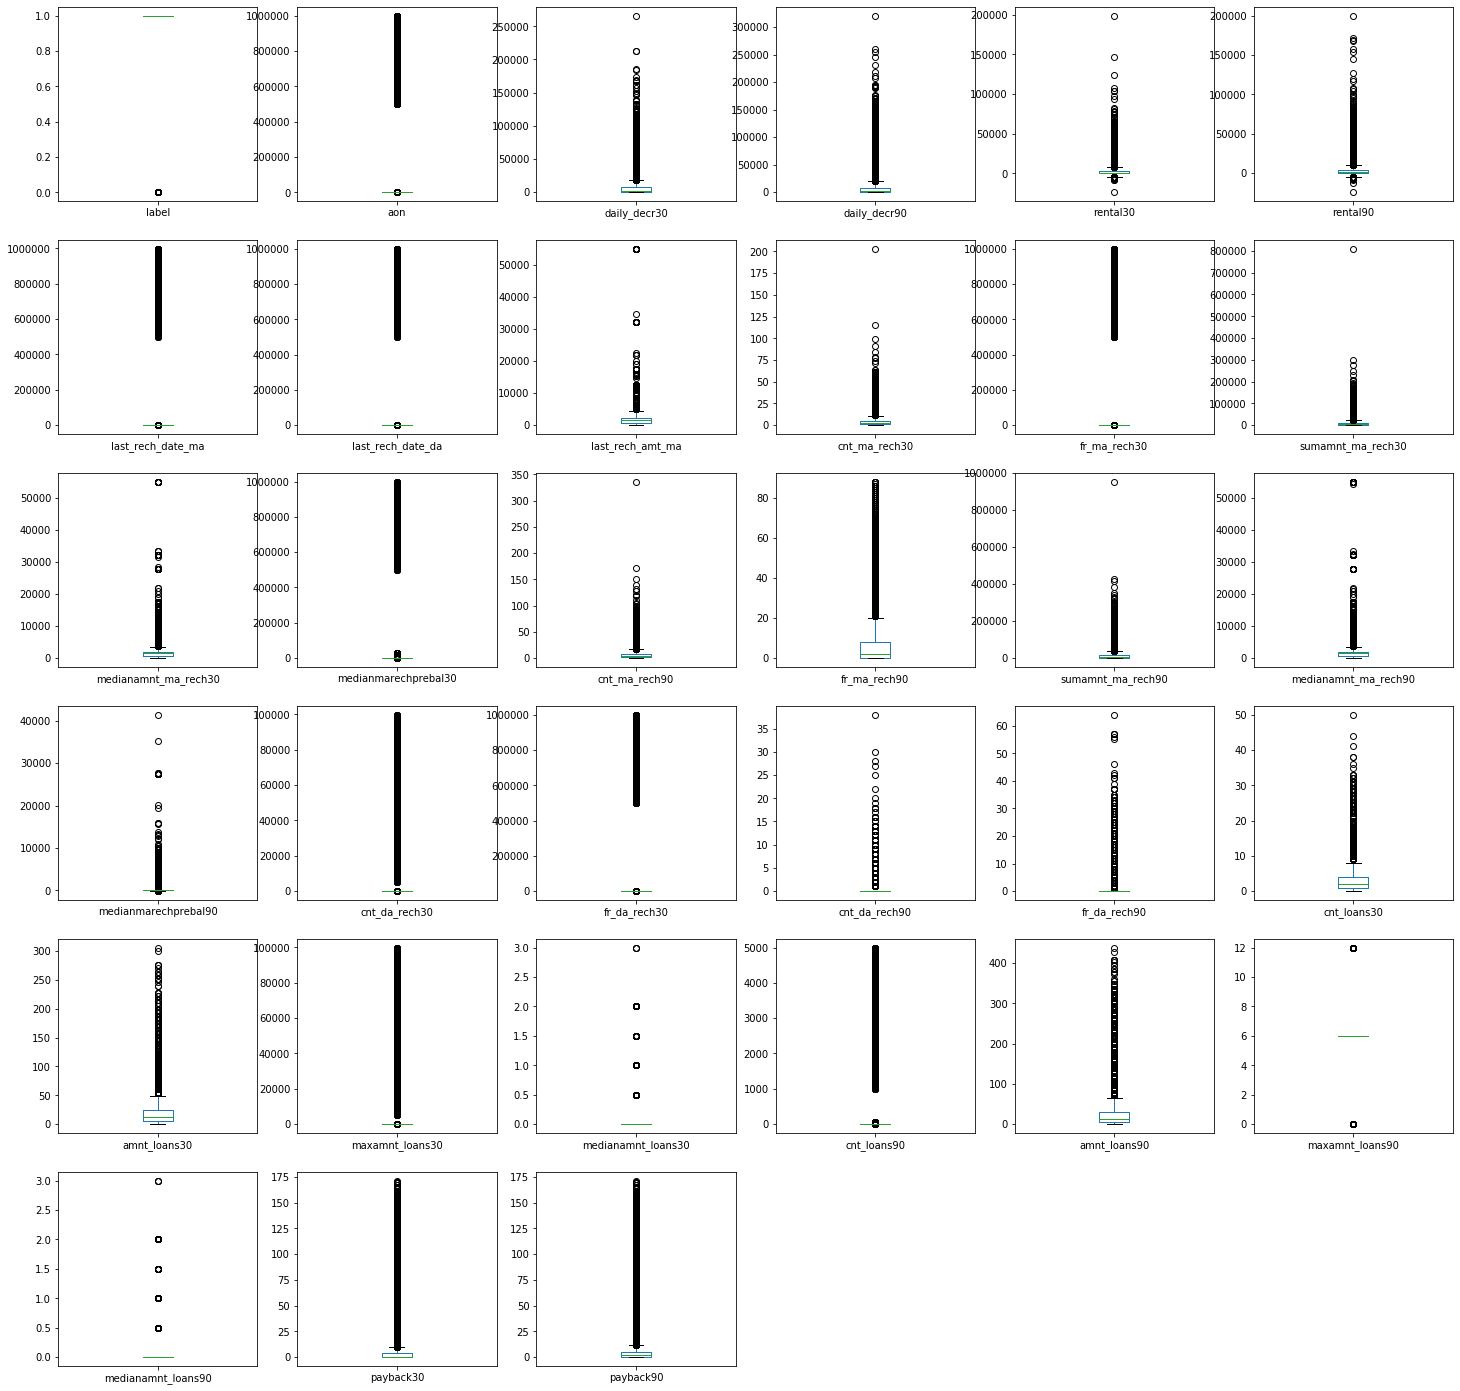

In [13]:

# Making Boxplot of all variables 
df1.plot(kind='box',subplots=True,layout=(6,6),figsize=(25,25))

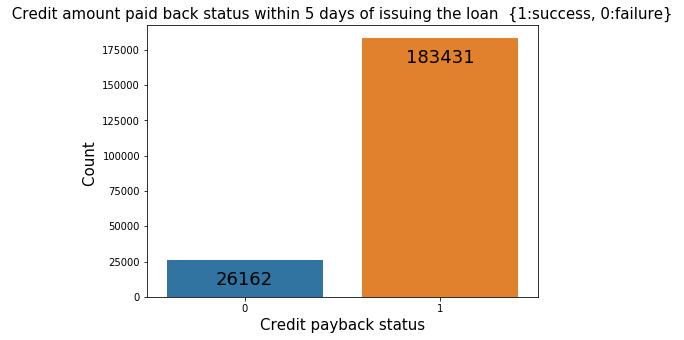

In [29]:
# Countplot of  user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}.
plt.figure(figsize=(7,5))
pd =sns.countplot(x = "label" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, -20), 
                   textcoords = 'offset points')
plt.xlabel("Credit payback status", size=15)
plt.ylabel("Count " ,size=15)
plt.title (" Credit amount paid back status within 5 days of issuing the loan  {1:success, 0:failure} " , size=15)
plt.show()

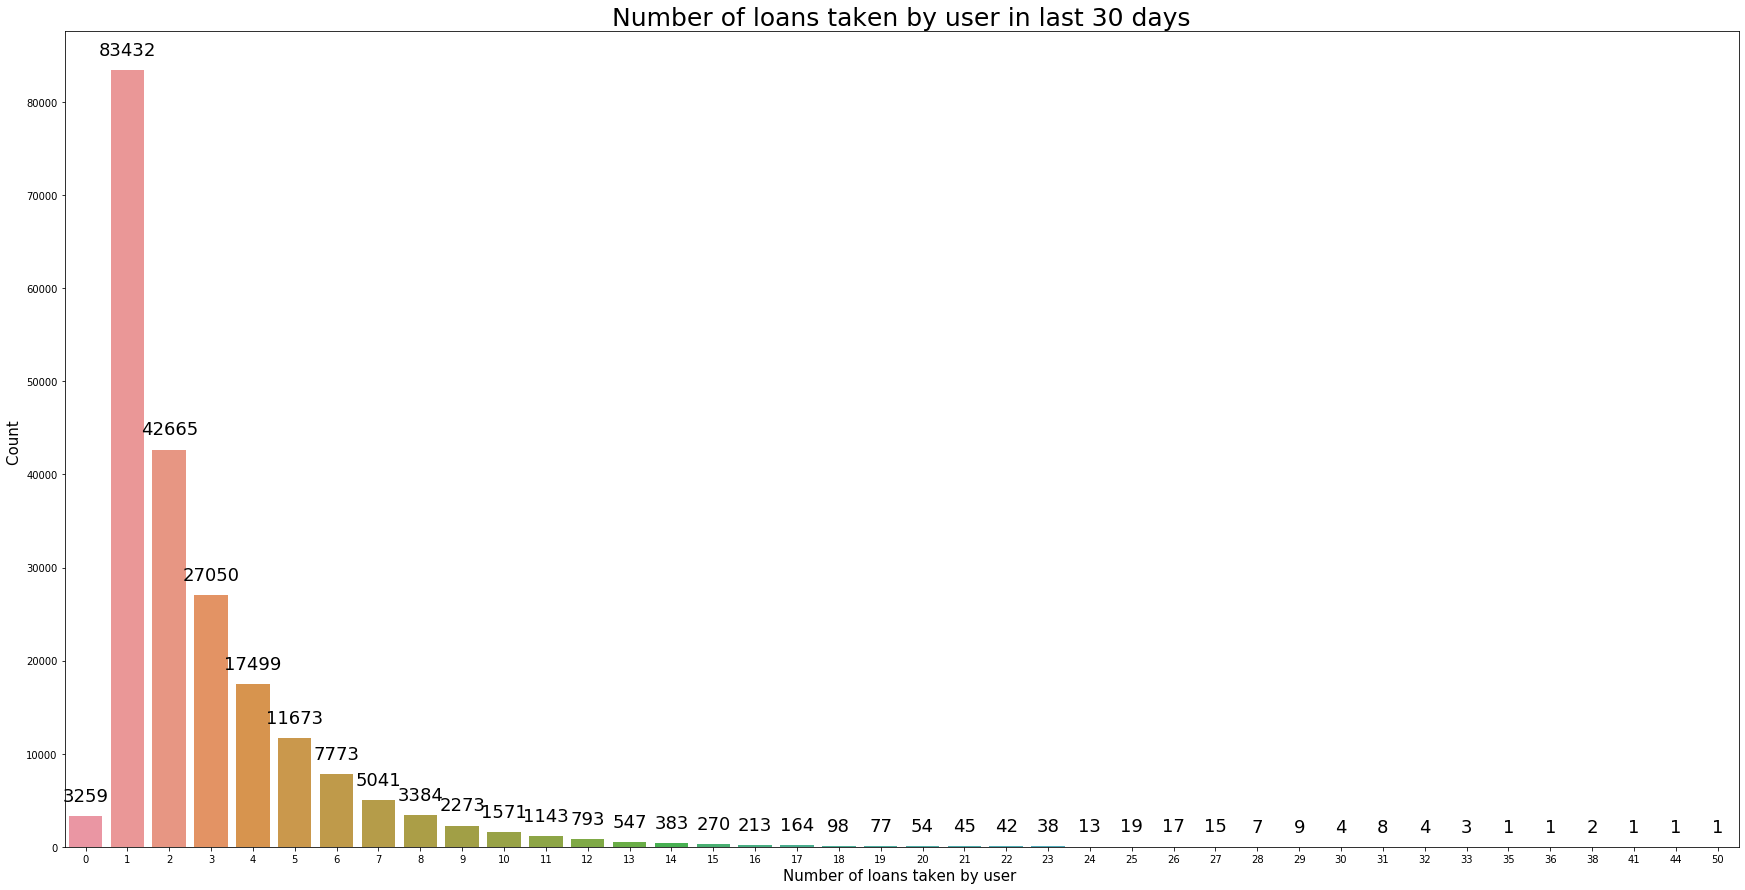

In [30]:
# Countplot of  Number of loans taken by user in last 30 days.
plt.figure(figsize=(30,15))
pd =sns.countplot(x = "cnt_loans30" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xlabel("Number of loans taken by user ", size=15)
plt.ylabel("Count " ,size=15)
plt.title (" Number of loans taken by user in last 30 days " , size=25)
plt.show()

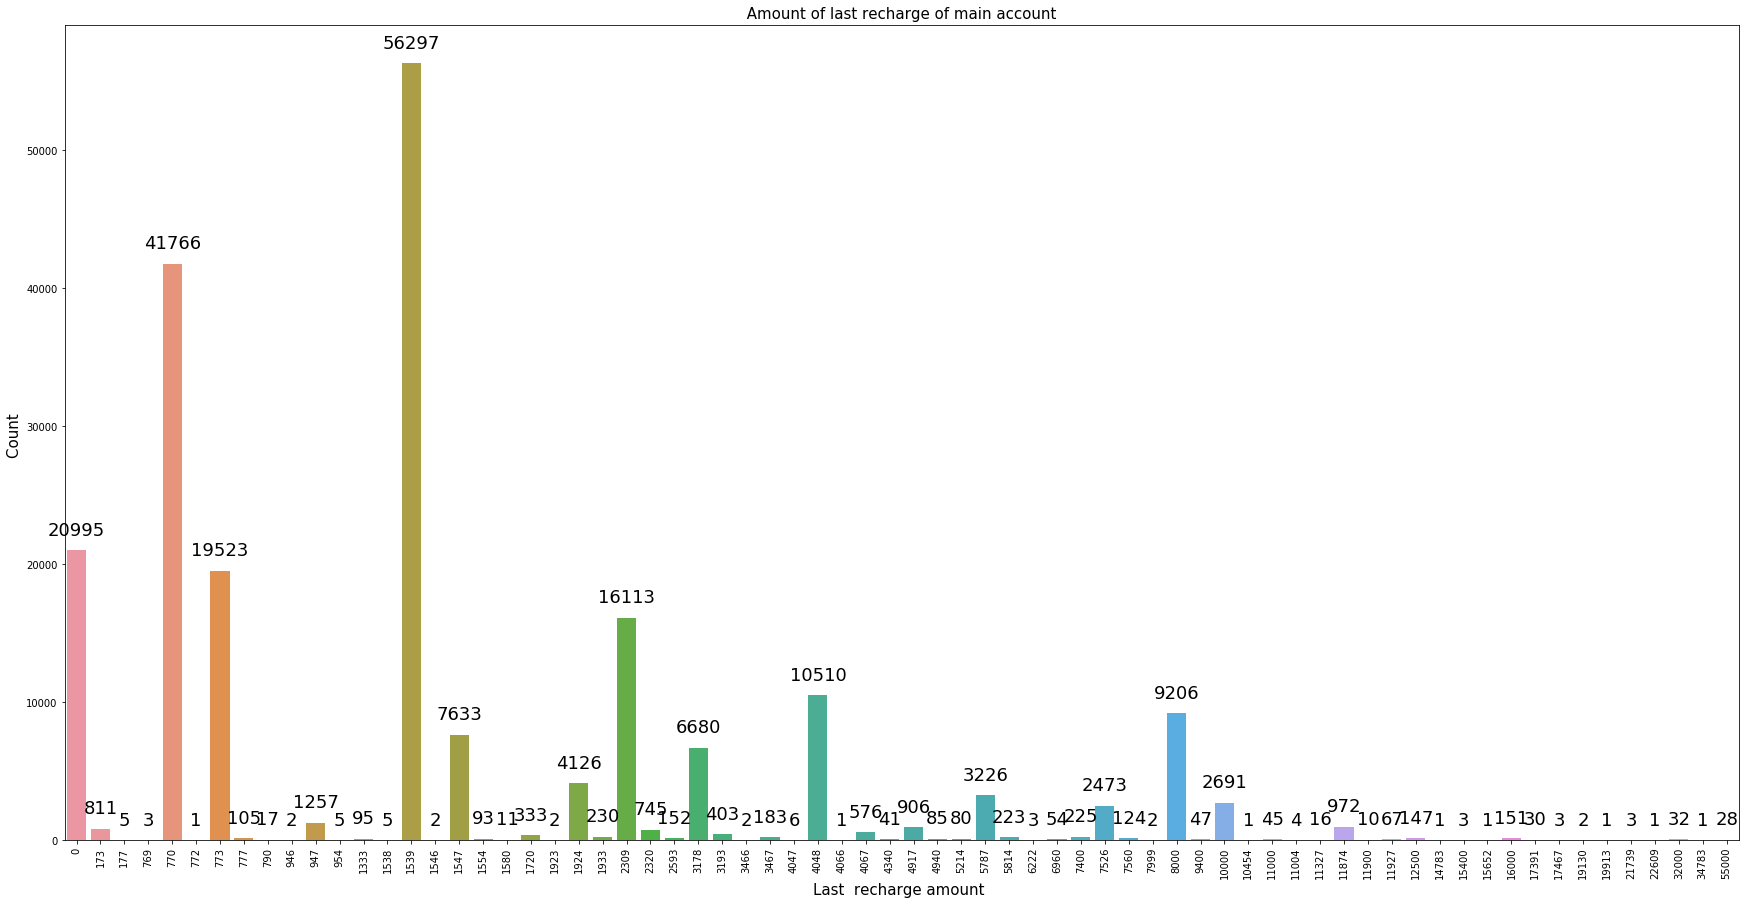

In [31]:
# Countplot of Amount of last recharge of main account .
plt.figure(figsize=(30,15))
pd =sns.countplot(x = "last_rech_amt_ma" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Last  recharge amount ", size=15)
plt.ylabel("Count " ,size=15)
plt.title (" Amount of last recharge of main account " , size=15)
plt.show()

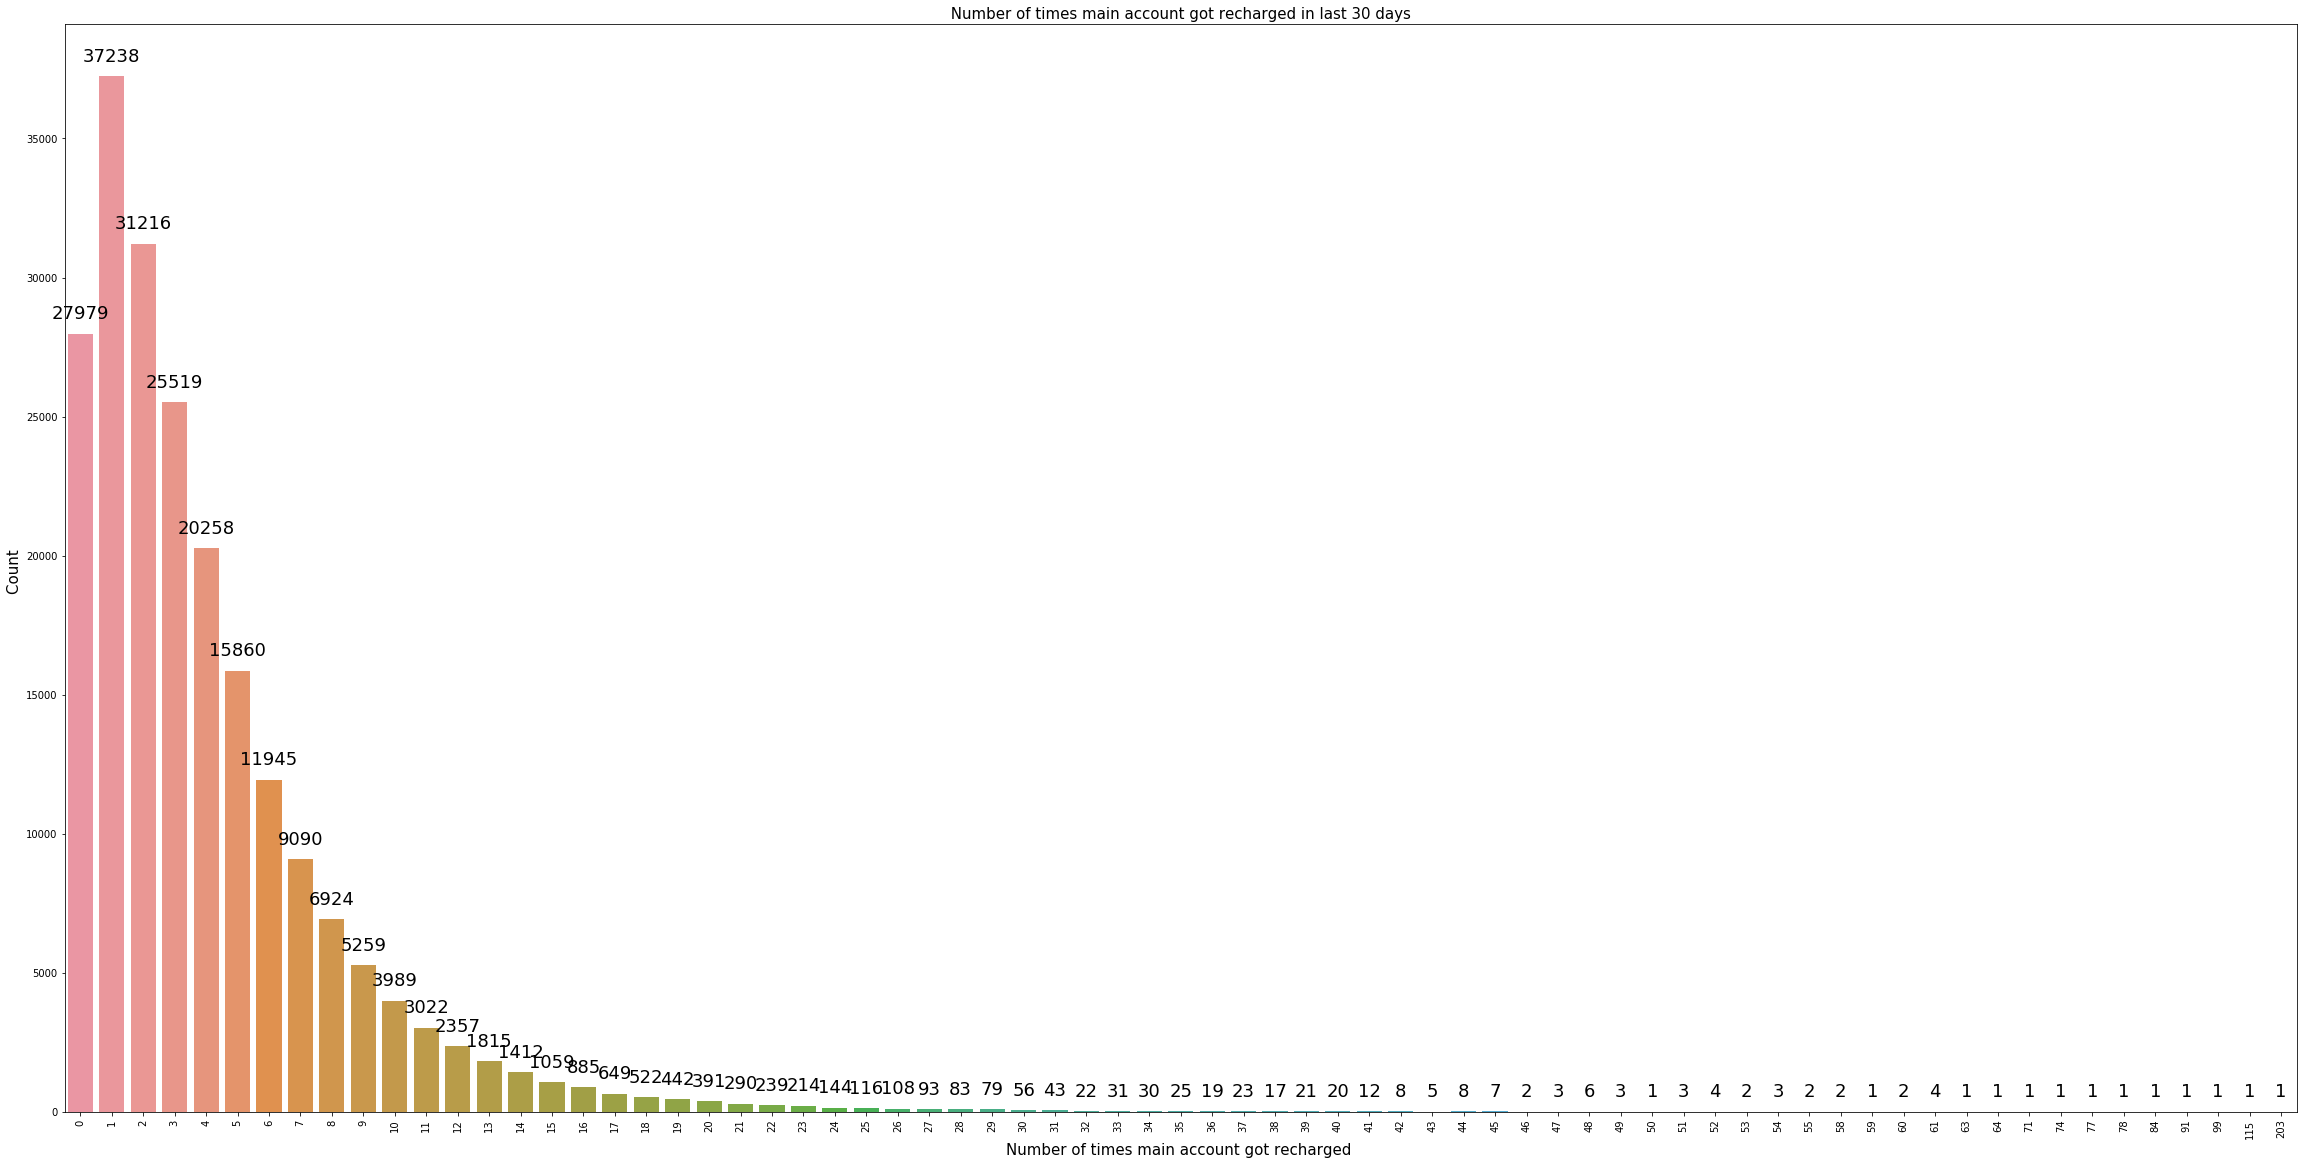

In [32]:
# Countplot of Number of times main account got recharged in last 30 days .
plt.figure(figsize=(40,20))
pd =sns.countplot(x = "cnt_ma_rech30" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Number of times main account got recharged ", size=15)
plt.ylabel("Count " ,size=15)
plt.title (" Number of times main account got recharged in last 30 days " , size=15)
plt.show()


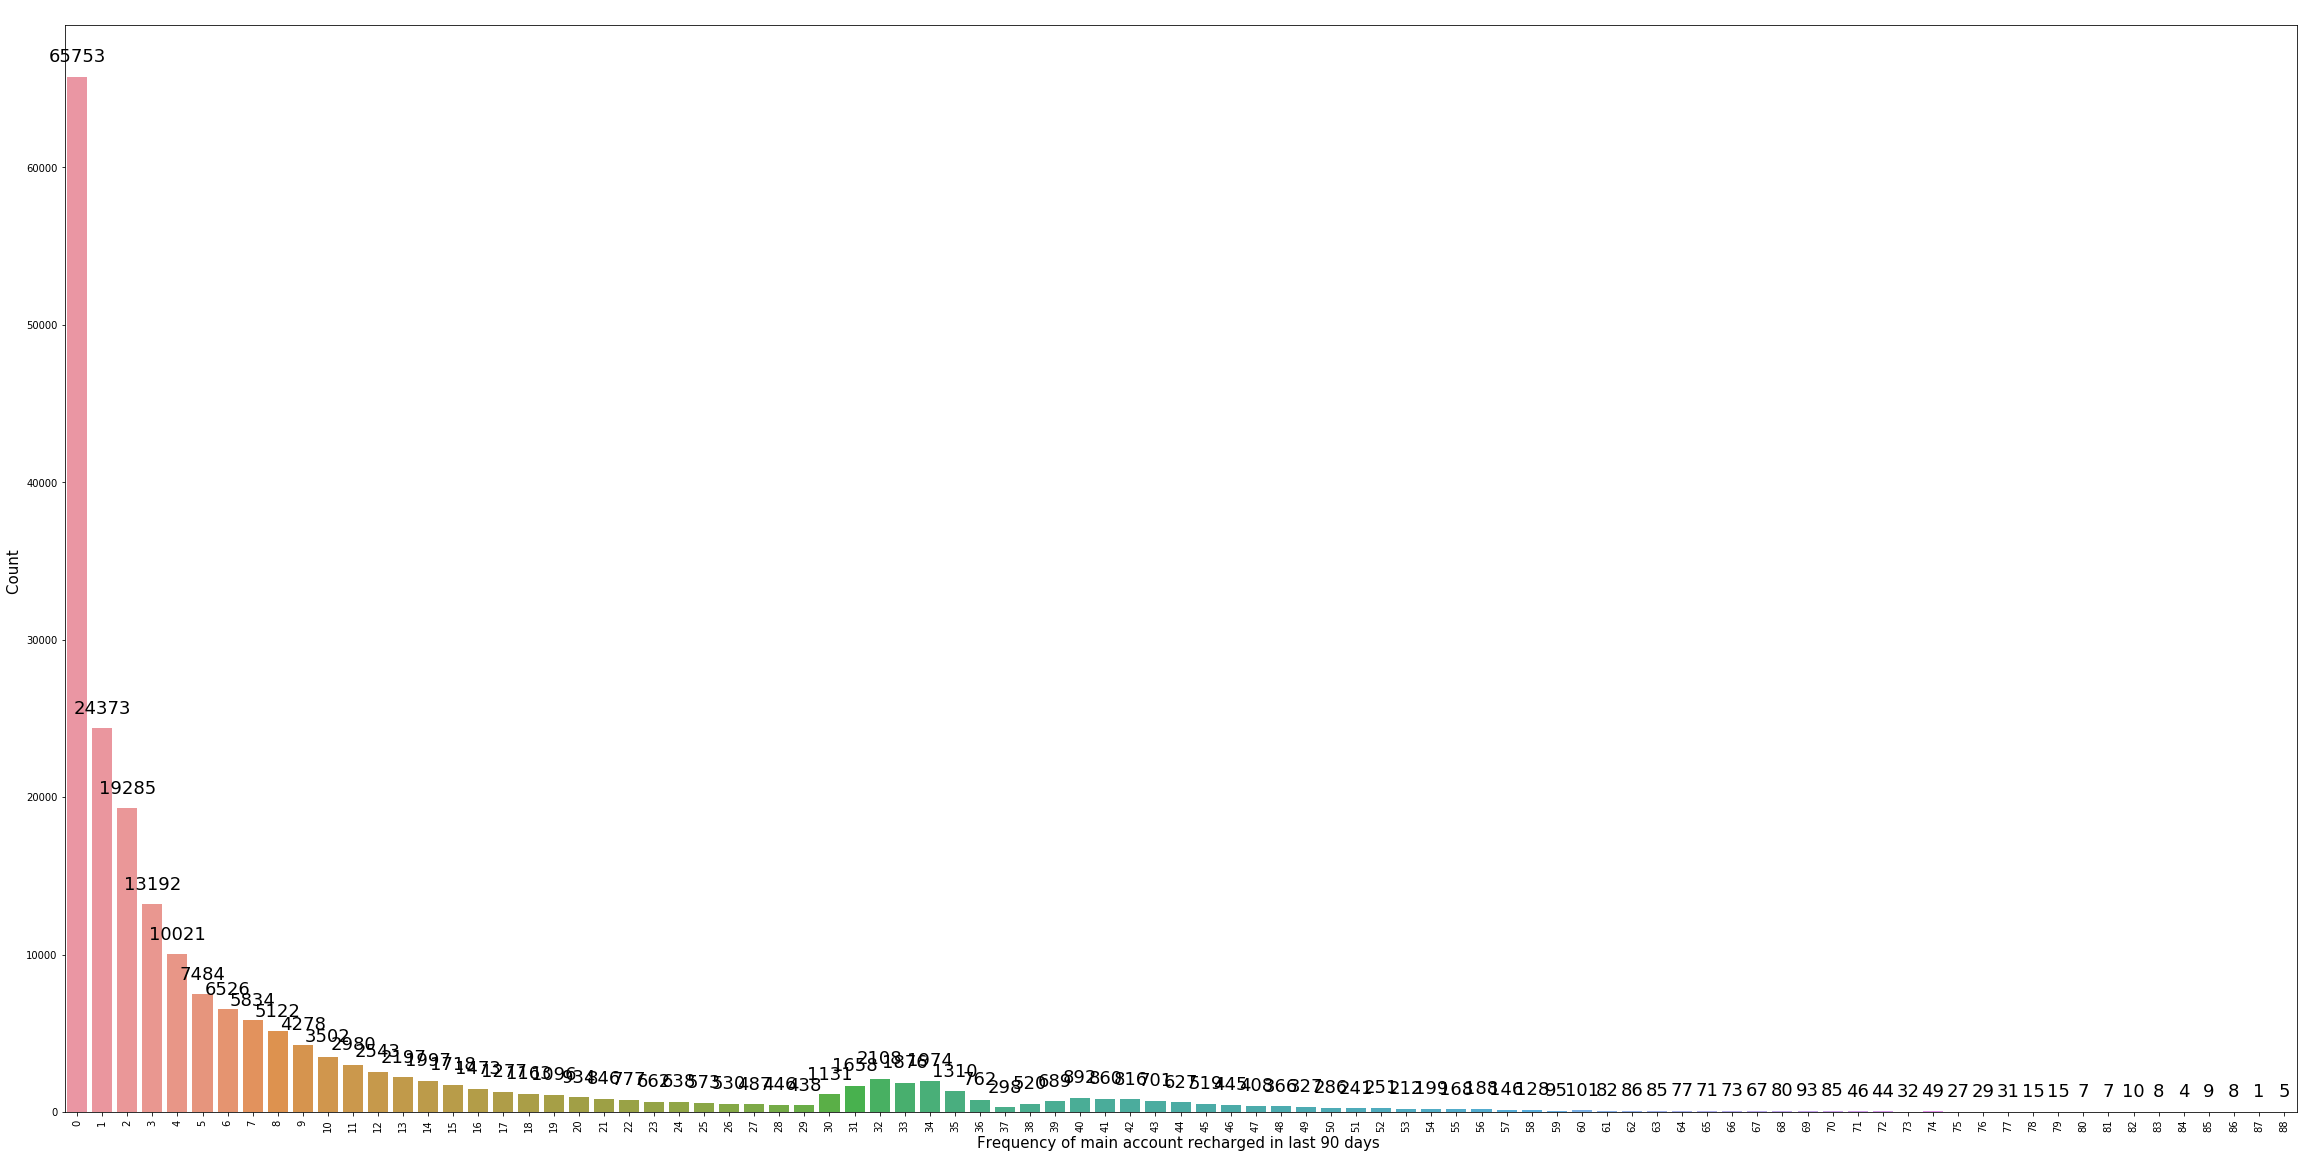

In [33]:
# Countplot of Frequency of main account recharged in last 90 days .
plt.figure(figsize=(40,20))
pd =sns.countplot(x = "fr_ma_rech90" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Frequency of main account recharged in last 90 days ", size=15)
plt.ylabel("Count " ,size=15)
plt.title ("  " , size=15)
plt.show()

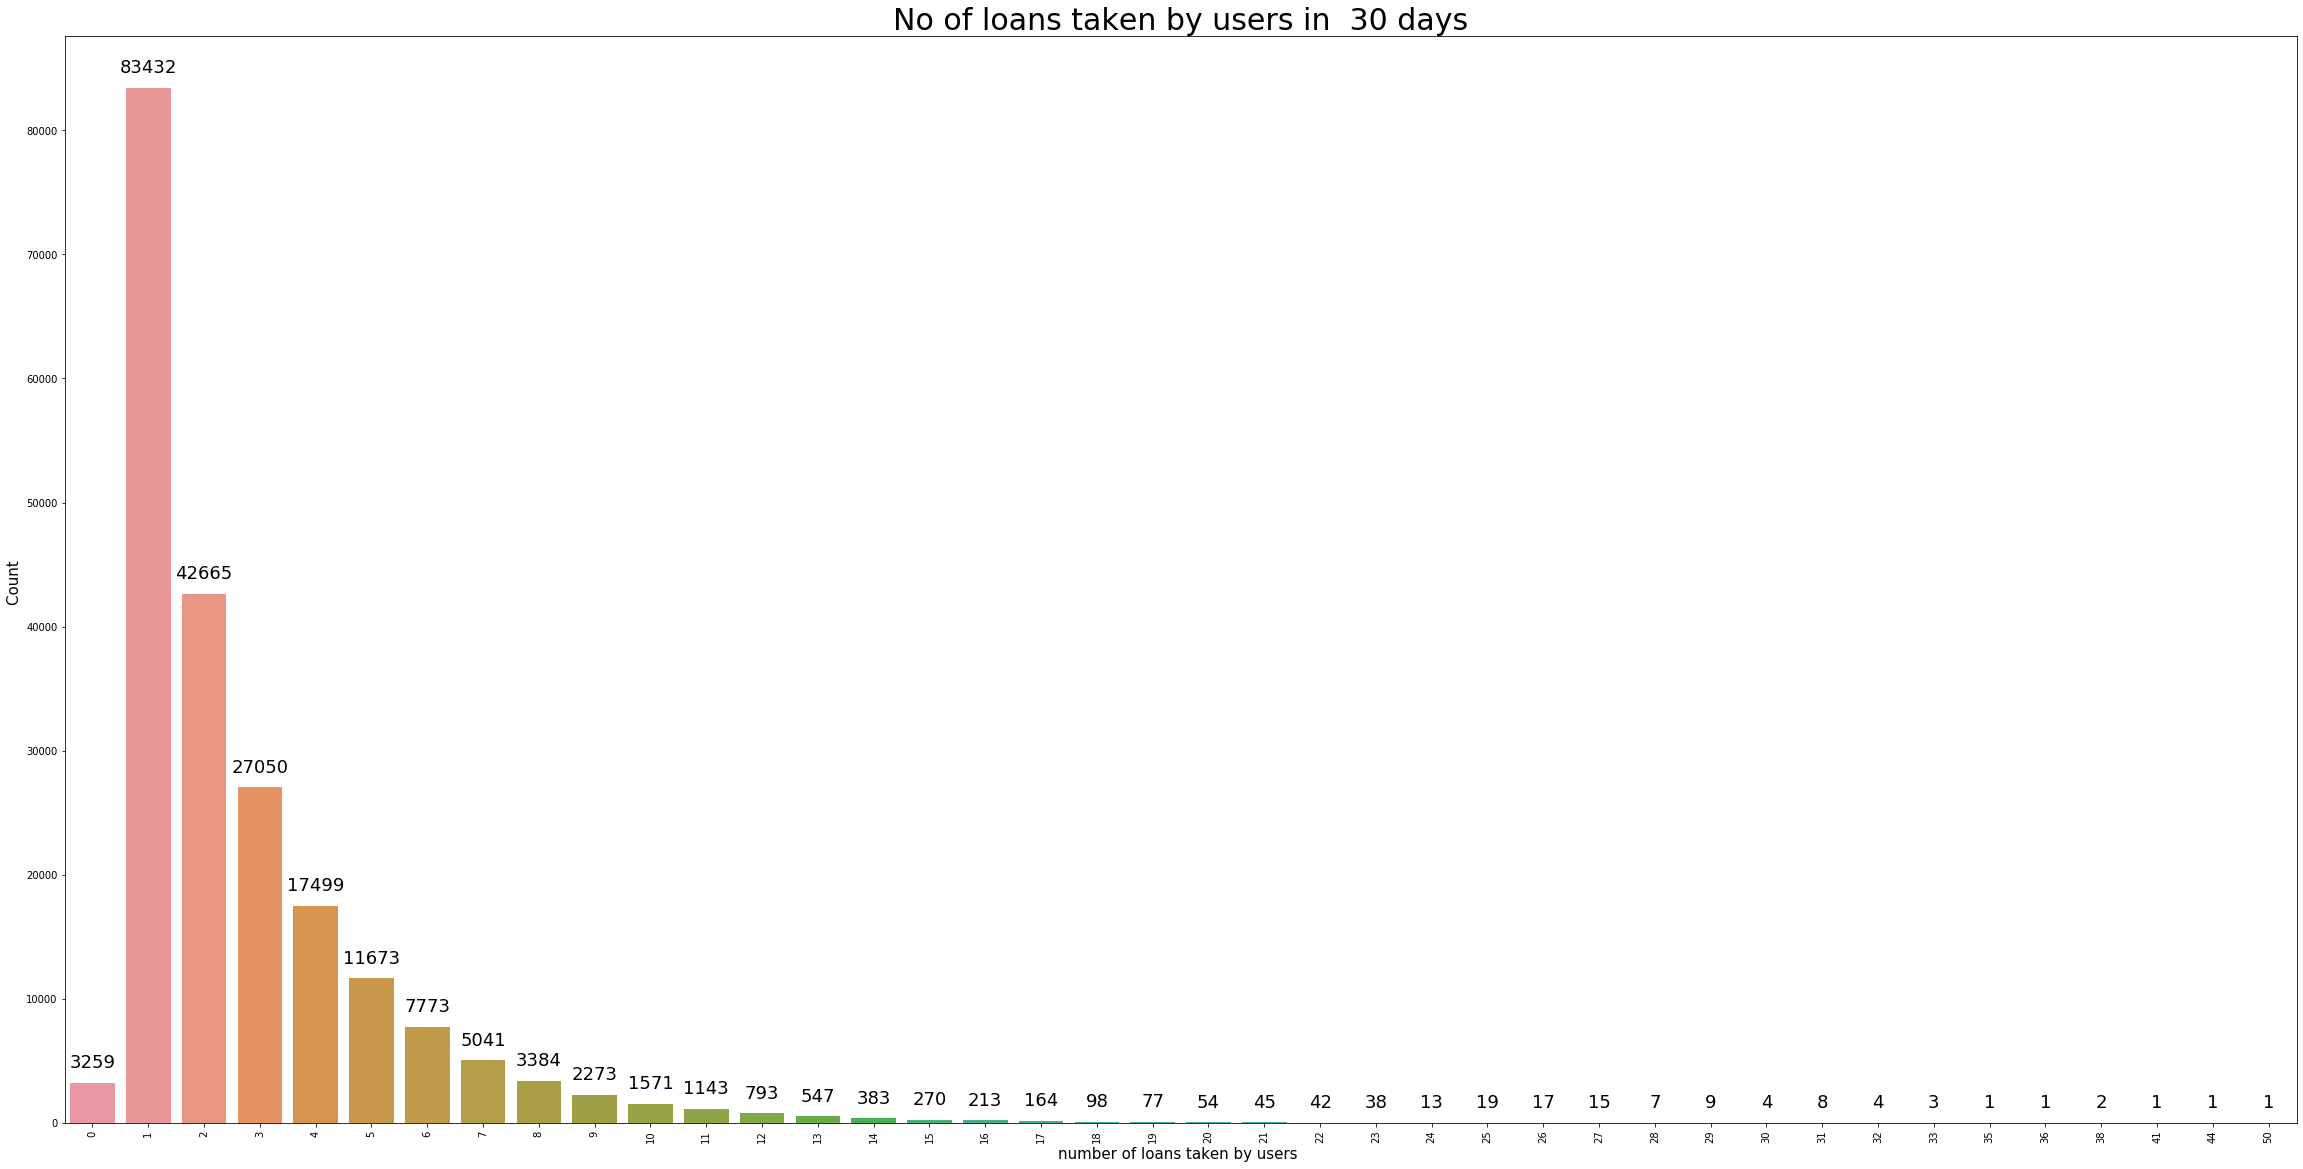

In [17]:
# Countplot of  Number of loans taken by user in last 30 days .
plt.figure(figsize=(40,20))
pd =sns.countplot(x = "cnt_loans30" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("number of loans taken by users ", size=15)
plt.ylabel("Count " ,size=15)
plt.title ("  No of loans taken by users in  30 days  " , size=30)
plt.show()

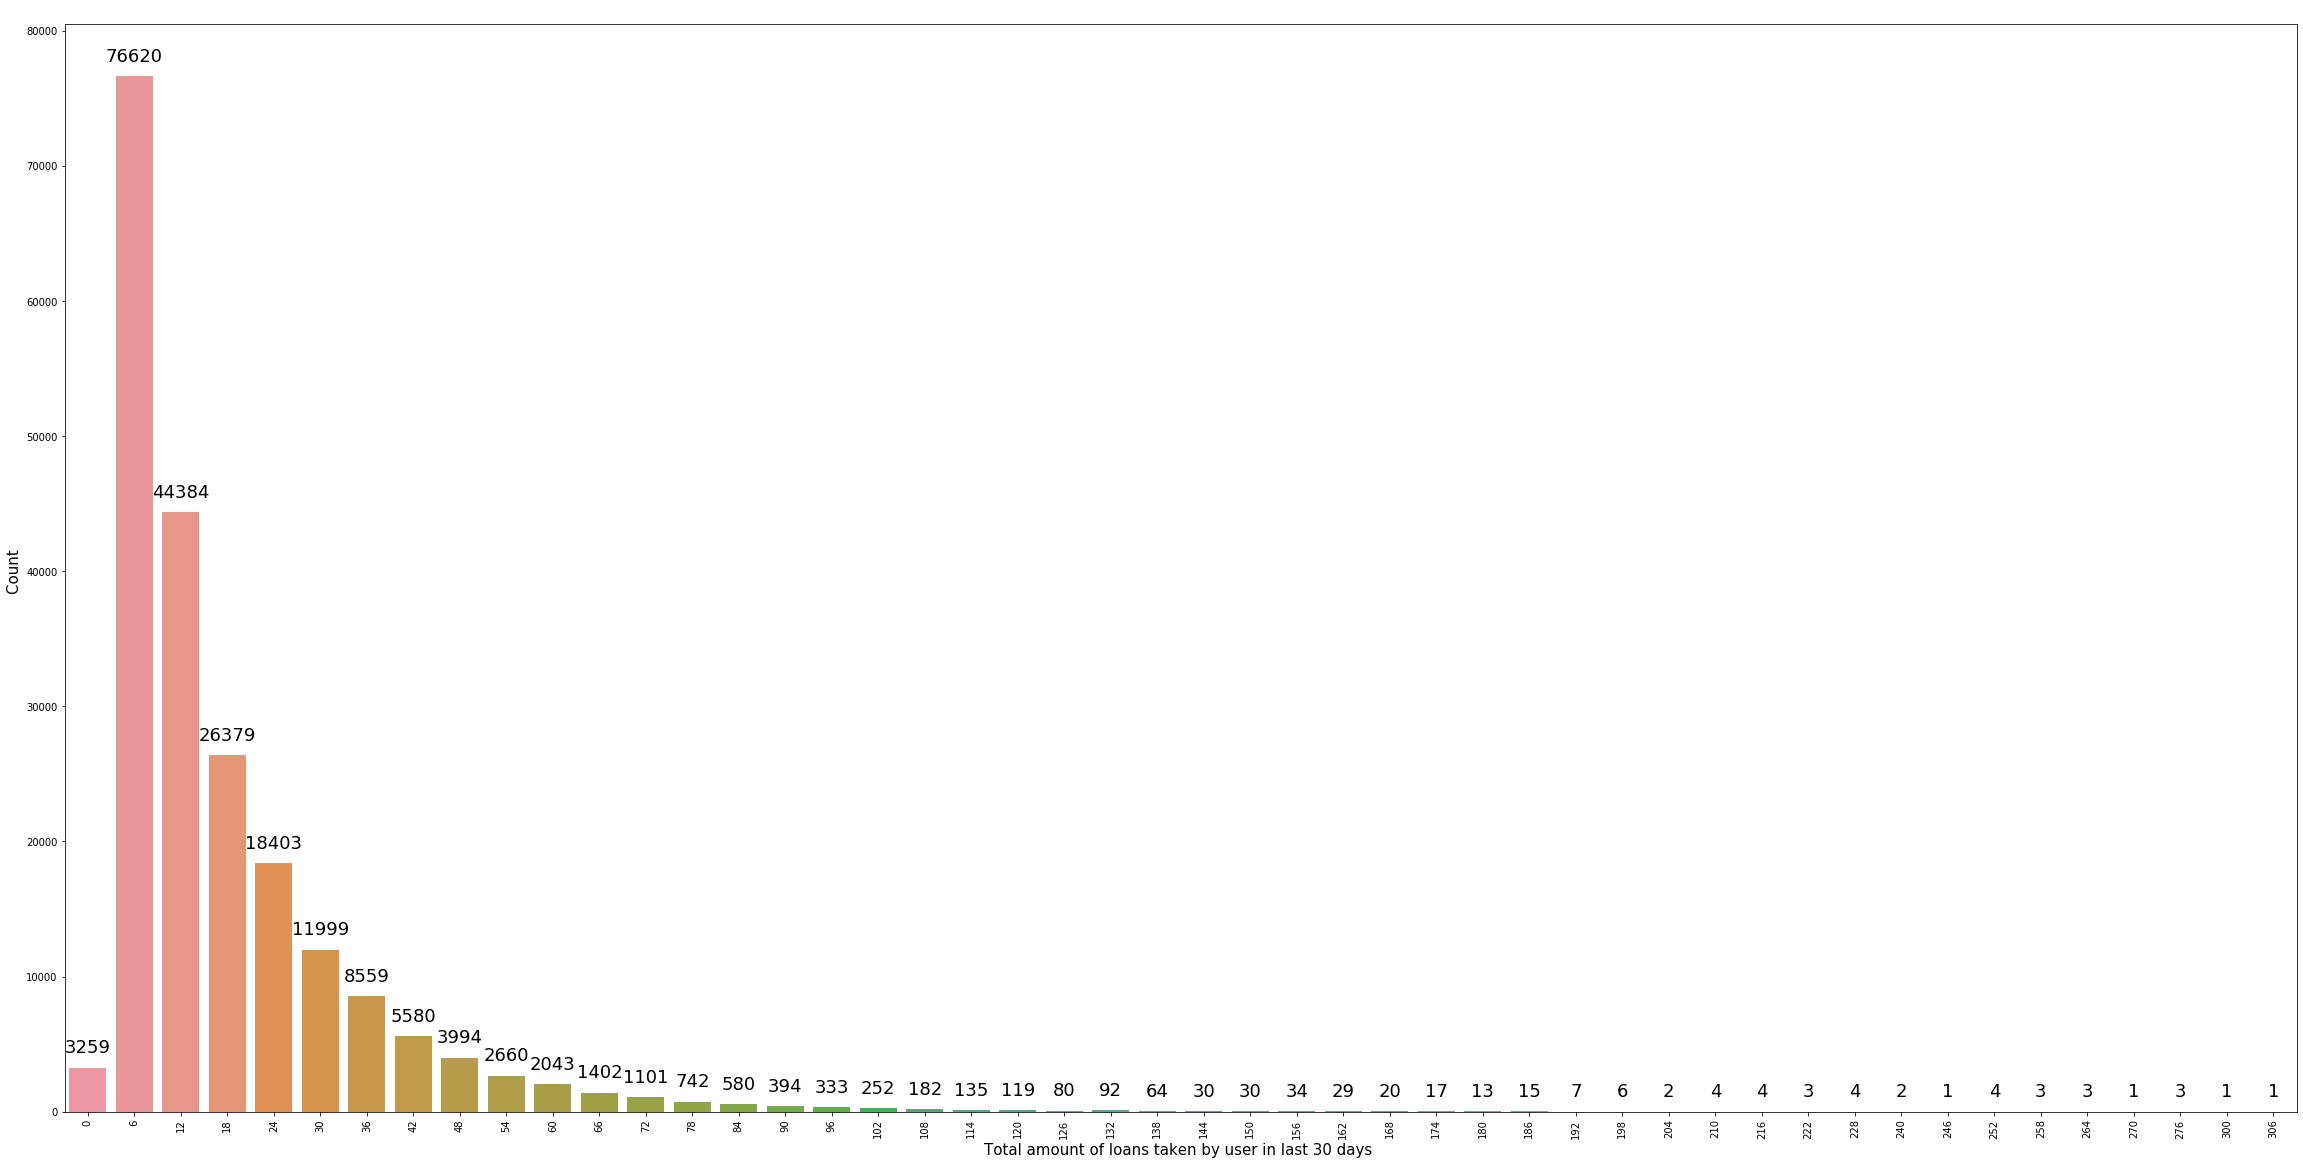

In [35]:
# Countplot of Total amount of loans taken by user in last 30 days .
plt.figure(figsize=(40,20))
pd =sns.countplot(x = "amnt_loans30" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 20), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Total amount of loans taken by user in last 30 days ", size=15)
plt.ylabel("Count " ,size=15)
plt.title ("  " , size=15)
plt.show()

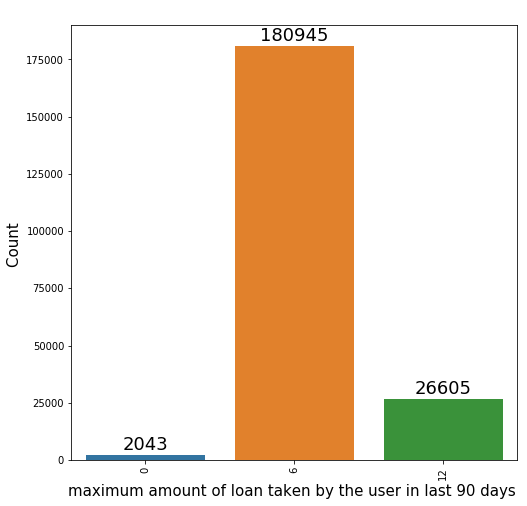

In [36]:
# Countplot of maximum amount of loan taken by the user in last 90 days .
plt.figure(figsize=(8,8))
pd =sns.countplot(x = "maxamnt_loans90" ,  data=df1)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("maximum amount of loan taken by the user in last 90 days ", size=15)
plt.ylabel("Count " ,size=15)
plt.title ("  " , size=15)
plt.show()

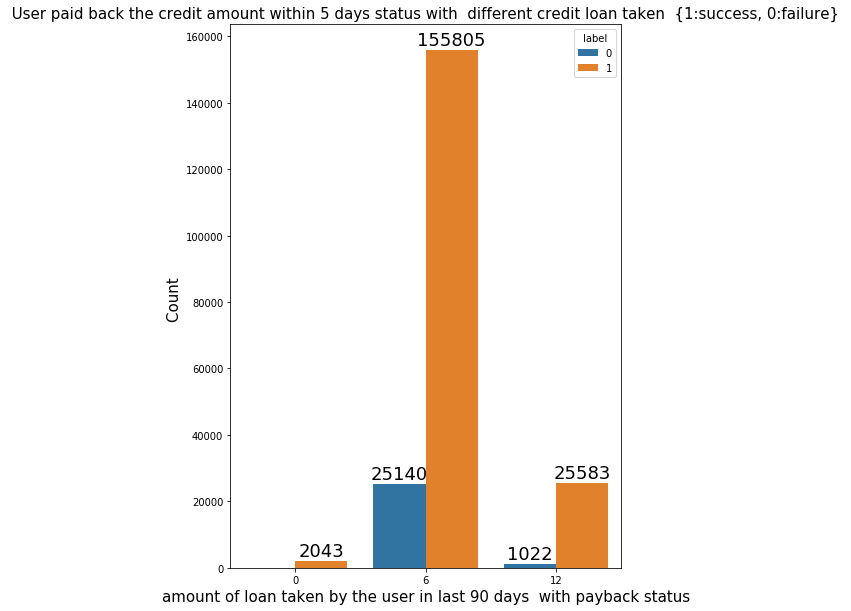

In [15]:
# Countplot of  user paid back the credit amount  within 5 days status with  different credit loan taken.
plt.figure(figsize=(7,10))
pd =sns.countplot(x = "maxamnt_loans90" ,  data=df1  , hue= 'label')
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xlabel("amount of loan taken by the user in last 90 days  with payback status", size=15)
plt.ylabel("Count " ,size=15)
plt.title (" User paid back the credit amount within 5 days status with  different credit loan taken  {1:success, 0:failure} " , size=15)
plt.show()

In [13]:
# droping Loan_ID column from Train dataset
df2= df1.drop(['msisdn','pdate' ,'pcircle'],axis = 1)

In [14]:
df2

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [15]:
# Calculating Zscore 
from scipy.stats import zscore
z=np.abs(zscore(df2))
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.09776412, 0.73103667, ..., 0.22959366, 0.38562959,
        0.41923266],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 0.22959366, 0.06820893,
        0.04735622],
       [0.37765836, 0.08428915, 0.77075515, ..., 0.22959366, 0.38562959,
        0.59938541],
       [0.37765836, 0.08628398, 0.09674426, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [16]:
# Removing Outliners from  Dataset 
df3=df2[(z<3).all(axis=1)]

In [17]:
# Shape of the database 
df3.shape

(161465, 33)

# Splitting Data into target and Input

In [18]:
x=df2.iloc[:,1:-1]
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000
209590,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000
209591,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000


In [19]:
y=df2.iloc[:,0]
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [20]:
# standard scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler(copy=True, with_mean=True, with_std=True)


# Importing Necessary libraries

In [21]:


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV

# Finding Best random state of different algorithim

In [23]:
max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for LogisticRegression  ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    dtc=DecisionTreeClassifier()
    dtc.fit(train_x,train_y)
    pred=dtc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for DecisionTreeClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    gnb=GaussianNB()
    gnb.fit(train_x,train_y)
    pred=gnb.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for GaussianNB", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.20)
    ada=AdaBoostClassifier()
    ada.fit(train_x,train_y)
    pred=ada.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for AdaBoostClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

The max accuracy score  for LogisticRegression   0.8723967651900093 is achieved at 81


The max accuracy score  for DecisionTreeClassifier  0.8709415778048141 is achieved at 86


The max accuracy score  for GaussianNB 0.5542116939812496 is achieved at 96


The max accuracy score  for AdaBoostClassifier 0.9063670411985019 is achieved at 81




# Using GridSearchCV to select best parameters

In [24]:
#Best parameters for Logistic Regression

lg=LogisticRegression()
parameters={"penalty":['l1' ,'l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for DecisionTreeClassifier
dtc=DecisionTreeClassifier()
parameters={"criterion" :("gini" ,"entropy"),'max_features':('auto', 'sqrt', 'log2')}
gd=GridSearchCV(dtc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


{'penalty': 'l2'}


{'criterion': 'entropy', 'max_features': 'sqrt'}






The model calculation for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=81, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) are:
[1 1 1 ... 1 1 1]
Accuracy Score=  0.8710369999284334
The CV Score is 0.8689412393519795

[[ 1006  1211]
 [ 4195 35507]]

              precision    recall  f1-score   support

           0       0.19      0.45      0.27      2217
           1       0.97      0.89      0.93     39702

    accuracy                           0.87     41919
   macro avg       0.58      0.67      0.60     41919
weighted avg       0.93      0.87      0.89     41919



roc_auc_score 0.5802216211421924


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model calculation for DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
        

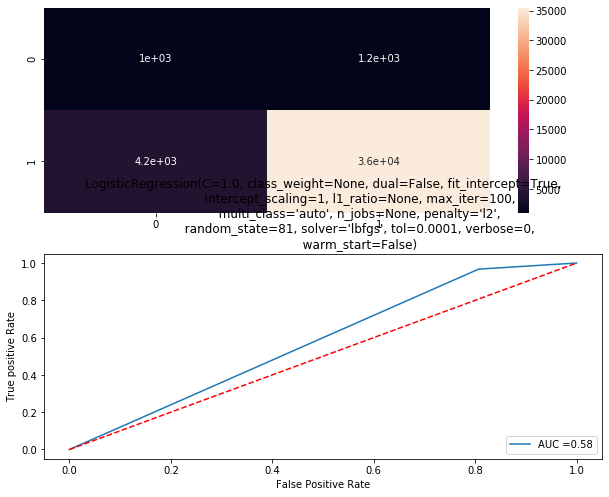

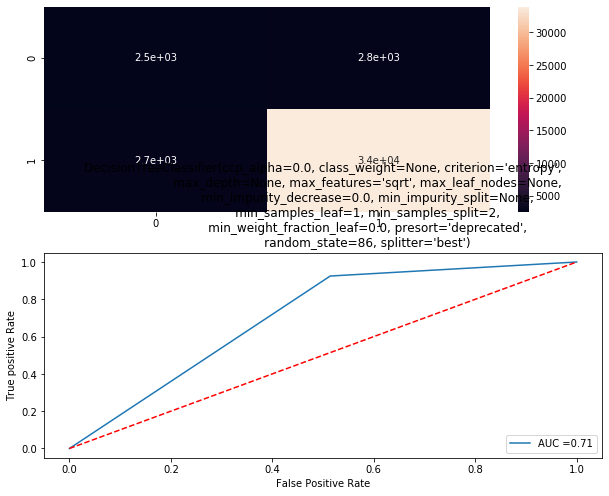

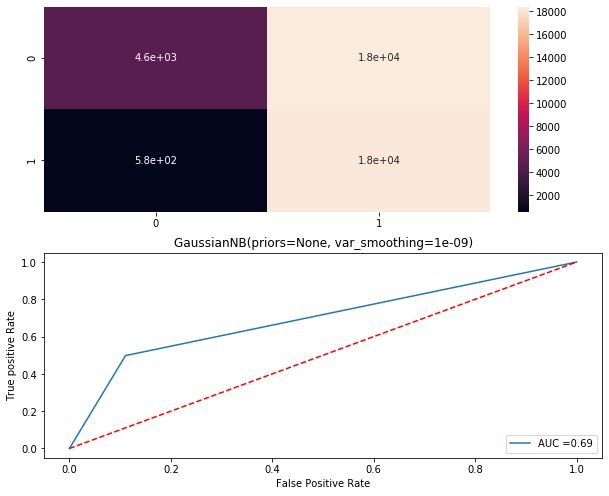

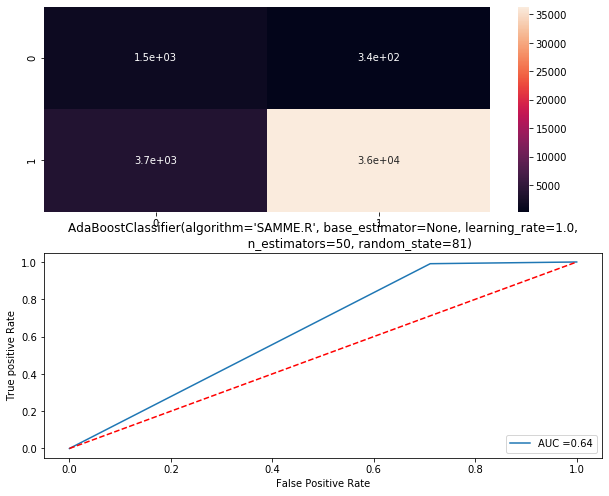

In [25]:
model=[]
score=[]
cvs=[]
rocscore=[]


for i in [LogisticRegression(penalty="l2" ,random_state= 81 ),
          DecisionTreeClassifier(criterion ="entropy" , random_state= 86  , max_features = 'sqrt'),
          GaussianNB( ),AdaBoostClassifier( random_state= 81)]:
          
          
        k=i
        model.append(i)
        print("\n")
        print("The model calculation for" ,i,"are:" )
        k.fit(train_x,train_y)
        k.score(train_x,train_y)
        predict =k.predict(test_x)
        print(predict)
        AS=accuracy_score(predict,test_y)
        print("Accuracy Score= " ,AS)
        score.append(AS)
        cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
        print("The CV Score is"  ,cv_score)
        cvs.append(cv_score)
        print("")
        cm=confusion_matrix(predict,test_y)
        print(cm)
        print("")
        print(classification_report(predict,test_y))
        print("\n")
        false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,predict)
        roc_auc=auc(false_positive_rate,true_positive_rate)
        print("roc_auc_score" ,roc_auc)
        rocscore.append(roc_auc)
        print("\n")
        plt.figure(figsize=(10,40))
        plt.subplot(911)
        print(sns.heatmap(cm,annot=True))
        plt.subplot(912)
        plt.title(i)
        plt.plot(false_positive_rate,true_positive_rate,label="AUC =%0.2f" %roc_auc)
        plt.plot([0,1] ,[0,1] ,'r--')
        plt.legend(loc="lower right")
        plt.ylabel('True positive Rate')
        plt.xlabel("False Positive Rate")


# Since Adaboost Classifier is giving better result so we choose it as final model

In [27]:
ada= AdaBoostClassifier(random_state= 81 ) 
ada.fit(train_x,train_y)
predict=ada.predict(test_x)
AS=accuracy_score(predict,test_y)
print("Accuracy Score=" ,AS)
cv_score=cross_val_score(ada,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score is", cv_score)

Accuracy Score= 0.9037667883298742
The CV Score is 0.9036609030763847


# Saving the model

In [28]:
from  sklearn.externals import joblib
joblib.dump(ada,"Micro_credit1.pkl")

['Micro_credit1.pkl']